# Seasonify

Convolutional Neural Network to predict the seasonal color of a person. 

According to [Color Analysis](https://en.wikipedia.org/wiki/Color_analysis_%28art%29) there are four main seasonal colors (Autumn, Spring, Summer, Winter). The categorization of a person within these classes is aimed to provide helpful information about the colors for clothes and makeup that best fits a person's skin complexion, eye color, and hair color. 


## 1. Load data

There are many faces databases out there. In this particular project I will be using the [Color Feret database](https://www.nist.gov/itl/iad/image-group/color-feret-database)

The images were collected in a semi-controlled environment.The FERET database was collected in 15 sessions between August 1993 and July 1996. The database contains 1564 sets of images for a total of 14,126 images that includes 1199 individuals.

The database contains images of the face in different angles with respect to the camera. Here, The database has been previously purged to only use the images where the angle to the camera is 0, +15, and -15.

Moreover, the seleted images have been cropped to show the face as much as possible within the frame. This removed unneeded information like background and clothes. After that, the pictures were resized to 128 x 128 pixels.



In [1]:
import glob
import numpy as np

def load_data_color_feret():
    
    autumn_path = "./colorferet_smaller/autumn"
    spring_path = "./colorferet_smaller/spring"
    summer_path = "./colorferet_smaller/summer"
    winter_path = "./colorferet_smaller/winter"

    X, y = [], []

    # autumn = 0
    # spring = 1
    # summer = 2
    # winter = 3
    for i, season_path in enumerate([autumn_path, spring_path, summer_path, winter_path]):
        for fname in glob.glob(season_path + "/*"): # regex for front images
            X.append(fname)
            y.append(i)
        
    return np.array(X), np.array(y)

# This database contains faces of brazilian college students
# The number of faces is smaller and there is no enough
# diversity
def load_data_fei():
    
    autumn_path = "./fei/autumn"
    spring_path = "./fei/spring"
    summer_path = "./fei/summer"
    winter_path = "./fei/winter"

    X, y = [], []

    # autumn = 0
    # spring = 1
    # summer = 2
    # winter = 3
    for i, season_path in enumerate([autumn_path, spring_path, summer_path, winter_path]):
        for fname in glob.glob(season_path + "/*"): # regex for front images
            X.append(fname)
            y.append(i)
        
    return np.array(X), np.array(y)

# This database contains faces of people from the 
# University of Georgia.
# The number of faces is smaller and there is no enough
# diversity
def load_data_georgia():
    
    autumn_path = "./georgia/autumn"
    spring_path = "./georgia/spring"
    summer_path = "./georgia/summer"
    winter_path = "./georgia/winter"

    X, y = [], []

    # autumn = 0
    # spring = 1
    # summer = 2
    # winter = 3
    for i, season_path in enumerate([autumn_path, spring_path, summer_path, winter_path]):
        for fname in glob.glob(season_path + "/*"): # regex for front images
            X.append(fname)
            y.append(i)
        
    return np.array(X), np.array(y)

def load_data(source):
    
    if source == "color_feret":
        return load_data_color_feret()
    elif source == "fei":
        return load_data_fei()
    elif source == "georgia":
        return load_data_georgia()

X_all, y_all = load_data("color_feret")

assert len(X_all) == len(y_all)
print("Number of records in dataset: {:d}".format(len(X_all)))

Number of records in dataset: 3383


### 1.1 Visualize samples

The classification of the images within one of the four categories (Autumn, Spring, Summer and Winter) was done manually. There are several ways to determine the seasonal color of a person. In this project, I used the method proposed [here](http://www.thechicfashionista.com/seasonal-color-analysis-2.html).

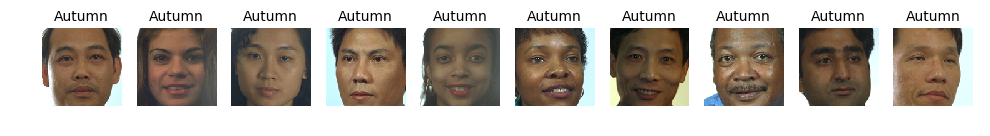

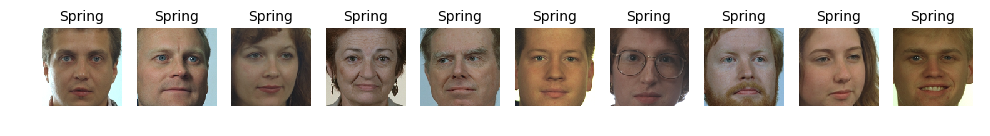

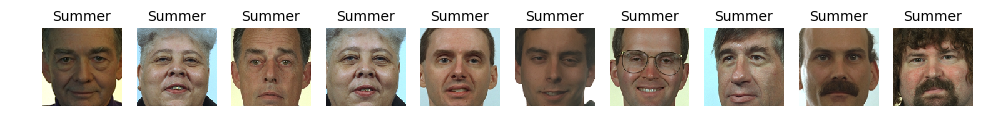

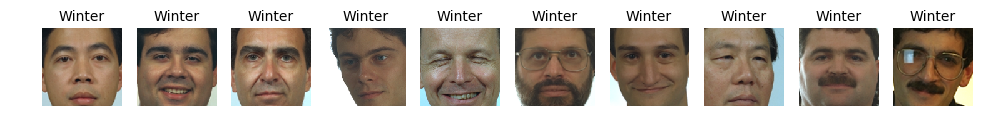

In [2]:
import matplotlib.pyplot as plt
from random import randrange
import cv2
%matplotlib inline

def get_random_images(X_data, y_data, number, clazz):
    samples = []
    
    while len(samples) < number:
        index = randrange(len(X_data))
        
        y = y_data[index]
        
        if y == clazz:
            samples.append(X_data[index])
            
    return np.array(samples)
        
def plot_images(images, titles, colors, interpolation="nearest"):
    assert len(images) == len(titles)
    n = len(images)
    
    f, ax = plt.subplots(1, n, figsize=(12, 12))
    
    for i, a in enumerate(ax):
        a.axis("off")
        a.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB), interpolation=interpolation)
        a.set_title(titles[i], fontsize=10, color=colors[i])

def plot_random_images(number):
    
    for i, clazz in enumerate(["Autumn", "Spring", "Summer", "Winter"]):
        paths = get_random_images(X_all, y_all, number, i)
        images = []
        titles = []
        colors = []
        for path in paths:
            images.append(cv2.imread(path))
            titles.append(clazz)
            colors.append("black")
        
        plot_images(images, titles, colors)
    
plot_random_images(10)

## 2. Analyze data
### 2.1. Histogram of classes

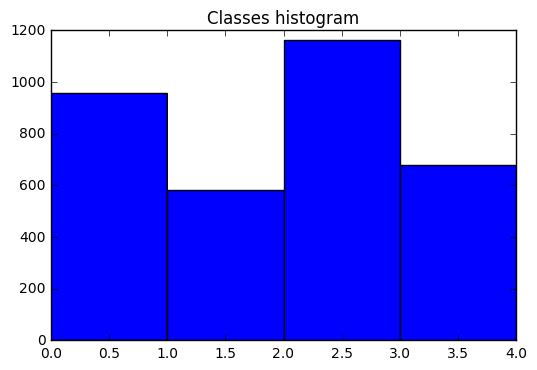

Number of elements in class Autumn: 956
Number of elements in class Spring: 583
Number of elements in class Summer: 1164
number of elements in class Winter: 680
Shape of samples: (128, 128, 3)


In [3]:
def histogram_of_classes():
    plt.hist(y_all, 4, (0, 4))
    plt.title("Classes histogram")
    plt.show()
    
    print("Number of elements in class Autumn: {:d}".format(len(y_all[y_all == 0])))
    print("Number of elements in class Spring: {:d}".format(len(y_all[y_all == 1])))
    print("Number of elements in class Summer: {:d}".format(len(y_all[y_all == 2])))
    print("number of elements in class Winter: {:d}".format(len(y_all[y_all == 3])))
    
    x_index = randrange(len(X_all))
    x_path = X_all[x_index]
    
    x_sample = cv2.imread(x_path)
    
    print("Shape of samples: {}".format(x_sample.shape))
    
histogram_of_classes()

### 2.2. Color spaces

There are many color spaces that can be used. However, one of the favorite color spaces for skin detection is [YCbCr](https://en.wikipedia.org/wiki/YCbCr) which will be used here.

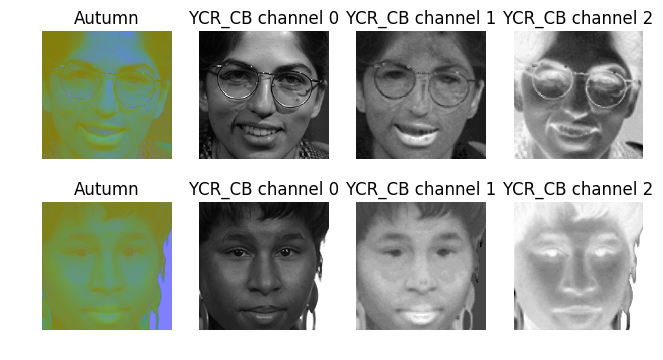

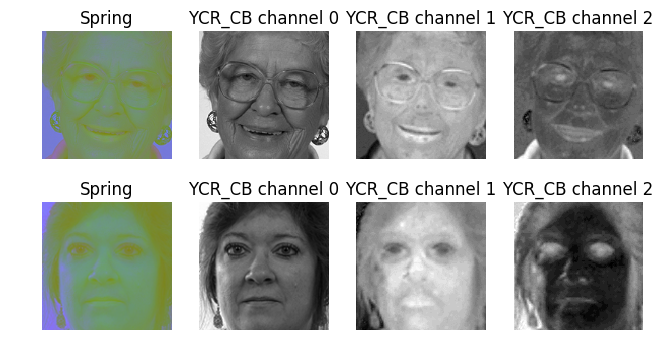

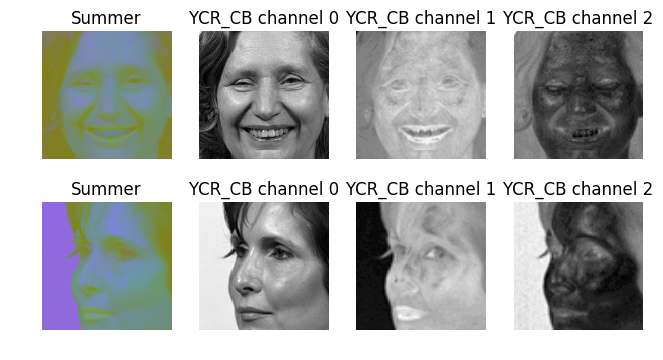

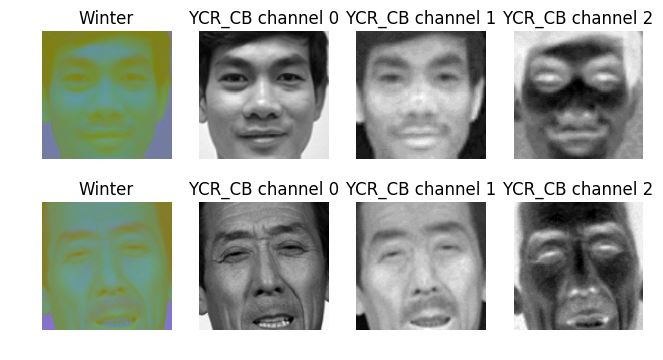

In [14]:
def plot_channels(images, titles, color_space, interpolation="nearest"):
    fig, ax = plt.subplots(len(images), 4, figsize=(12, 12))
    fig.tight_layout()
    for i, col in enumerate(ax):
        for j, row in enumerate(col):
            ax[i][j].axis("off")
            if j == 0:
                ax[i][j].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB), interpolation=interpolation)
                ax[i][j].set_title(titles[i])
            elif j == 1:
                ax[i][j].imshow(images[i][:,:,0], cmap="gray", interpolation=interpolation)
                ax[i][j].set_title(color_space + " channel 0")
            elif j == 2:
                ax[i][j].imshow(images[i][:,:,1], cmap="gray", interpolation=interpolation)
                ax[i][j].set_title(color_space + " channel 1")
            elif j == 3:
                ax[i][j].imshow(images[i][:,:,2], cmap="gray", interpolation=interpolation)
                ax[i][j].set_title(color_space + " channel 2")
        
    plt.subplots_adjust(left=0., right=.5, top=.375, bottom=.1)

def visualize_color_space(number, color_space):
    for i, clazz in enumerate(["Autumn", "Spring", "Summer", "Winter"]):
        paths = get_random_images(X_all, y_all, number, i)
        
        images = []
        titles = []
        for path in paths:
            image = cv2.imread(path)
            titles.append(clazz)
            if color_space == "YUV":
                images.append(cv2.cvtColor(image, cv2.COLOR_BGR2YUV))
            elif color_space == "YCR_CB":
                images.append(cv2.cvtColor(image, cv2.COLOR_BGR2YCR_CB))
        
        plot_channels(images, titles, color_space)
        
visualize_color_space(2, "YCR_CB")

## 3. Augment Data

The objective is to reduce overfitting and make the model generalize better. There are three modifications that can be applied to the images:
  * Blur
  * Translatinon
  * Rotation
  
The mentioned modifications will be applied over the images randomly.
  

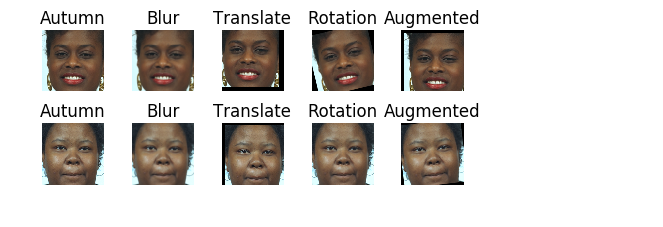

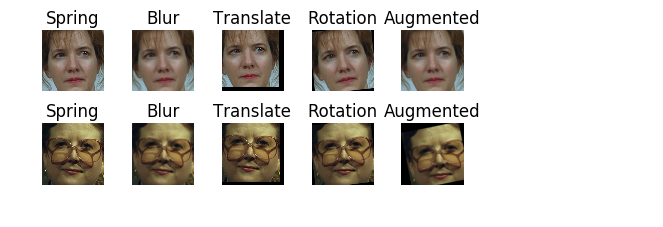

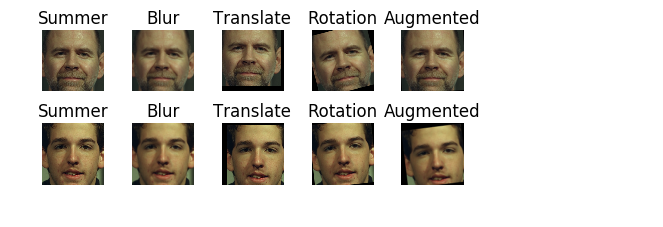

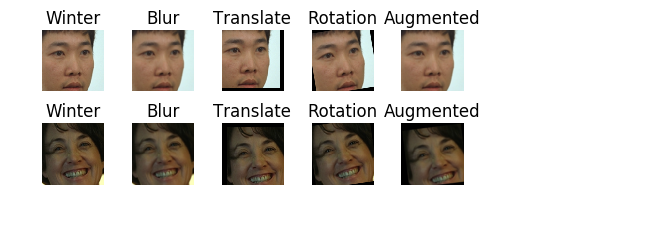

In [23]:
def blur_image(x):
    x_blur = cv2.GaussianBlur(x, (3, 3), 0)
   
    return x_blur

def translate_image(x):
    h, w, d = x.shape
    
    delta_y = randrange(int(h * 0.05), int(h * 0.1)) # 5 - 10% of height
    delta_x = randrange(int(w * 0.05), int(w * 0.1)) # 5 - 10% of width
    
    factor = 1 if randrange(0, 2) == 0 else -1
    
    delta_y *= factor
    delta_x *= factor
    
    M = np.float32([[1, 0, delta_x], [0, 1, delta_y]])
    x_translated = cv2.warpAffine(x, M, (w, h))
    
    return x_translated

def rotate_image(x):
    h, w, d = x.shape

    delta = randrange(1, 16) # between 0 - 15 degrees

    M = cv2.getRotationMatrix2D((w/2,h/2), delta, 1)
    x_rotated = cv2.warpAffine(x, M, (w, h))
    
    return x_rotated

def augment_image(x, random_limit):
    
    augmented = np.copy(x)
    limit = random_limit

    factor = randrange(0, limit)
    if factor == 0:
        augmented = translate_image(augmented)
        
    factor = randrange(0, limit)
    if factor == 0:
        augmented = rotate_image(augmented)
        
    factor = randrange(0, limit)
    if factor == 0:
        augmented = blur_image(augmented)
        
    return augmented
    
def plot_augmentations(images, titles, interpolation="nearest"):
    fig, ax = plt.subplots(len(images), 7, figsize=(12, 12))
    fig.tight_layout()
    for i, col in enumerate(ax):
        for j, row in enumerate(col):
            ax[i][j].axis("off")
            if j == 0:
                ax[i][j].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB), interpolation=interpolation)
                ax[i][j].set_title(titles[i])
            elif j == 1:
                ax[i][j].imshow(cv2.cvtColor(blur_image(images[i]), cv2.COLOR_BGR2RGB), interpolation=interpolation)
                ax[i][j].set_title("Blur")
            elif j == 2:
                ax[i][j].imshow(cv2.cvtColor(translate_image(images[i]), cv2.COLOR_BGR2RGB), interpolation=interpolation)
                ax[i][j].set_title("Translate")
            elif j == 3:
                ax[i][j].imshow(cv2.cvtColor(rotate_image(images[i]), cv2.COLOR_BGR2RGB), interpolation=interpolation)
                ax[i][j].set_title("Rotation")
            elif j == 4:
                ax[i][j].imshow(cv2.cvtColor(augment_image(images[i], 2), cv2.COLOR_BGR2RGB), interpolation=interpolation)
                ax[i][j].set_title("Augmented")
                
    plt.subplots_adjust(left=0., right=.5, top=.25, bottom=.1)


def visualize_augmentations(number):
    
    for i, clazz in enumerate(["Autumn", "Spring", "Summer", "Winter"]):
        paths = get_random_images(X_all, y_all, number, i)
        
        images = []
        titles = []
        for path in paths:
            image = cv2.imread(path)
            images.append(image)
            titles.append(clazz)
        
        plot_augmentations(images, titles)

visualize_augmentations(2)


## 4. Define Model

The model is a neural network with 4 convolutions and 4 fully connected layers. Relu activations are used before each layer.

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Lambda
from keras.layers.convolutional import Convolution2D
from keras.optimizers import Adam
from keras.layers import InputLayer

def get_model(final_height, final_width, final_depth):
    
    image_shape = (final_height, final_width, final_depth)
    
    model = Sequential()
   
    model.add(Lambda(lambda x: x/127.5 - 1., input_shape=image_shape, output_shape=image_shape, name="input_images"))
    
    model.add(Convolution2D(24, 5, 5, subsample=(2, 2), border_mode="valid", activation='relu'))
    model.add(Convolution2D(36, 5, 5, subsample=(2, 2), border_mode="valid", activation='relu'))
    model.add(Convolution2D(48, 5, 5, subsample=(2, 2), border_mode="valid", activation='relu'))
    model.add(Convolution2D(64, 5, 5, subsample=(2, 2), border_mode="valid", activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(4, activation='softmax', name="output_labels"))
    
    optimizer = Adam(lr=0.001)
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

    return model

## 5. Train model


In [27]:
def generator(Xpath, y, batch_size):

    total_input = len(Xpath)
    
    while True:
        features, targets = [], []
        i = 0
        while len(features) < batch_size:
            index = randrange(0, total_input)
            path = Xpath[index]
            
            label = y[index]
            image = cv2.imread(path)
            image = augment_image(image, 2)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2YCR_CB)
           
            features.append(image)
            targets.append(label)
            
        yield (np.array(features), np.array(targets))

def getFeaturesTargets(Xpath, y):
    feats = []
    targets = []
    for path, label in zip(Xpath, y):
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2YCR_CB)
        feats.append(image)
        targets.append(label)

    return np.array(feats), np.array(targets)

def plot_metrics(history):
    keys = history.history.keys()

    for k in keys:
        plt.clf()
        plt.plot(history.history[k])
        plt.title("model " + k)
        plt.ylabel(k)
        plt.xlabel('epoch')
        plt.show()
        
import json
from keras import backend as K
from tensorflow.contrib.session_bundle import exporter

def train_model(X_train, y_train, X_val, y_val):
    learning_rate = 0.001
    training_size = 3200
    batch_size = 160
    learning_rate = 0.001
    epochs = 30
    
    model = get_model(128, 128, 3)
    
    history =  model.fit_generator(
            generator(X_train, y_train, batch_size),
            samples_per_epoch = training_size,
            validation_data = getFeaturesTargets(X_val, y_val),
            nb_epoch = epochs
        )
 
    model.save_weights("model.h5")
    with open("model.json", "w+") as outfile:
        json.dump(model.to_json(), outfile)

    plot_metrics(history)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.3, random_state=50)
train_model(X_train, y_train, X_test, y_test)


Epoch 1/30
  24/3200 [..............................] - ETA: 5359s - loss: 1.3312 - acc: 0.3503

KeyboardInterrupt: 

## 6. Export
### 6.1 Get tensorflow graph

In order to be able to use the model in Android, it has to be a tensorflow model.

In [30]:
from tensorflow.contrib.session_bundle import exporter
from keras.models import model_from_json
from keras import backend as K
import tensorflow as tf
import json

def export_tensor():
    with open("model.json", 'r') as jfile:
        new_model = model_from_json(json.loads(jfile.read()))\

    new_model.compile("adam", "sparse_categorical_crossentropy")
    new_model.load_weights("model.h5")

    ####################################################################
    K.set_learning_phase(0)
    

    export_path = "./"
    export_version = 1

    sess = tf.Session()
    init_op = tf.global_variables_initializer()

    saver = tf.train.Saver(sharded=True)
    sess.run(init_op)
    model_exporter = exporter.Exporter(saver)
    signature = exporter.classification_signature(input_tensor=new_model.input,
                                                  scores_tensor=new_model.output)
   
    model_exporter.init(sess.graph.as_graph_def(),
                        default_graph_signature=signature)

    model_exporter.export(export_path, tf.constant(export_version), sess)
    
    tf.train.write_graph(sess.graph_def, ".", "seasonify.pb.txt")
    tf.train.write_graph(sess.graph_def, ".", "seasonify.pb", as_text=False)
    
    # input_images_input  input images
    # output_labels/Softmax output labels
    # [print(n.name) for n in tf.get_default_graph().as_graph_def().node]

export_tensor()

INFO:tensorflow:./00000001-tmp/export is not in all_model_checkpoint_paths. Manually adding it.
input_images_input
input_images/truediv/y
input_images/truediv
input_images/sub/y
input_images/sub
conv2d_1/random_uniform/shape
conv2d_1/random_uniform/min
conv2d_1/random_uniform/max
conv2d_1/random_uniform/RandomUniform
conv2d_1/random_uniform/sub
conv2d_1/random_uniform/mul
conv2d_1/random_uniform
conv2d_1/kernel
conv2d_1/kernel/Assign
conv2d_1/kernel/read
conv2d_1/Const
conv2d_1/bias
conv2d_1/bias/Assign
conv2d_1/bias/read
conv2d_1/convolution/Shape
conv2d_1/convolution/dilation_rate
conv2d_1/convolution
conv2d_1/BiasAdd
conv2d_1/Relu
conv2d_2/random_uniform/shape
conv2d_2/random_uniform/min
conv2d_2/random_uniform/max
conv2d_2/random_uniform/RandomUniform
conv2d_2/random_uniform/sub
conv2d_2/random_uniform/mul
conv2d_2/random_uniform
conv2d_2/kernel
conv2d_2/kernel/Assign
conv2d_2/kernel/read
conv2d_2/Const
conv2d_2/bias
conv2d_2/bias/Assign
conv2d_2/bias/read
conv2d_2/convolution/Shap

### 6.2 Freeze graph

In [67]:
import tensorflow as tf
from tensorflow.python.framework import graph_util

def freeze_graph():
    # We retrieve our checkpoint fullpath
    checkpoint = tf.train.get_checkpoint_state(".")
    input_checkpoint = checkpoint.model_checkpoint_path
    
    # We precise the file fullname of our freezed graph
    absolute_model_folder = "/".join(input_checkpoint.split('/')[:-1])
    output_graph = absolute_model_folder + "/frozen_model.pb"

    # Before exporting our graph, we need to precise what is our output node
    # This is how TF decides what part of the Graph he has to keep and what part it can dump
    # NOTE: this variable is plural, because you can have multiple output nodes
    output_node_names = "output_labels/Softmax"

    # We clear devices to allow TensorFlow to control on which device it will load operations
    clear_devices = True
    
    # We import the meta graph and retrieve a Saver
    saver = tf.train.import_meta_graph(input_checkpoint + '.meta', clear_devices=clear_devices)

    # We retrieve the protobuf graph definition
    graph = tf.get_default_graph()
    input_graph_def = graph.as_graph_def()

    # We start a session and restore the graph weights
    with tf.Session() as sess:
        saver.restore(sess, input_checkpoint)

        # We use a built-in TF helper to export variables to constants
        output_graph_def = graph_util.convert_variables_to_constants(
            sess, # The session is used to retrieve the weights
            input_graph_def, # The graph_def is used to retrieve the nodes 
            output_node_names.split(",") # The output node names are used to select the usefull nodes
        ) 

        # Finally we serialize and dump the output graph to the filesystem
        with tf.gfile.GFile(output_graph, "wb") as f:
            f.write(output_graph_def.SerializeToString())

        print("%d ops in the final graph." % len(output_graph_def.node))

freeze_graph()

INFO:tensorflow:Froze 16 variables.
Converted 16 variables to const ops.
71 ops in the final graph.


## 7. Predict

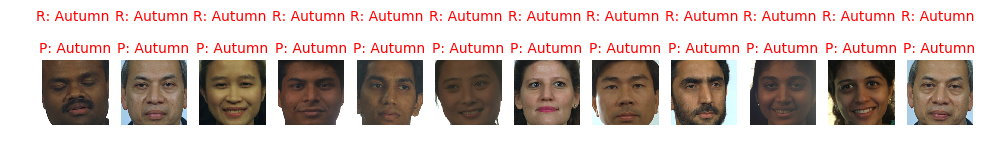

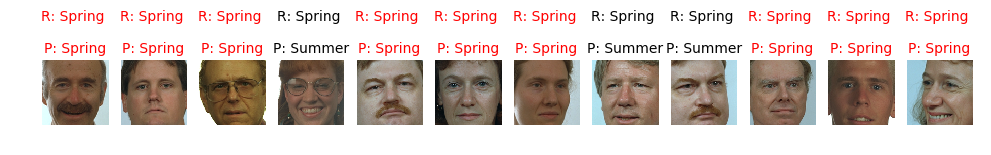

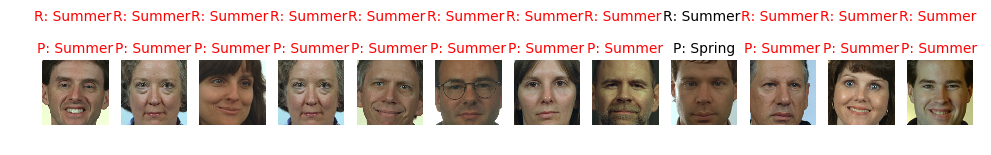

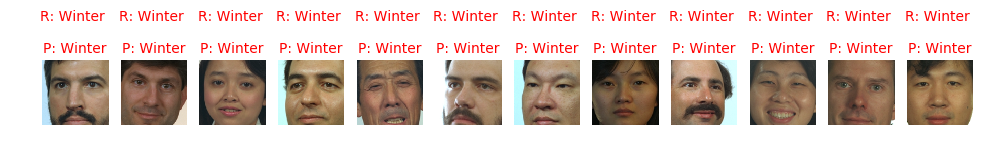

In [32]:
def load_data_unseen():
    
    autumn_path = "./testing/autumn"
    spring_path = "./testing/spring"
    summer_path = "./testing/summer"
    winter_path = "./testing/winter"

    X, y = [], []

    # autumn = 0
    # spring = 1
    # summer = 2
    # winter = 3
    for i, season_path in enumerate([autumn_path, spring_path, summer_path, winter_path]):
        for fname in glob.glob(season_path + "/*"): # regex for front images
            X.append(fname)
            y.append(i)
        
    return np.array(X), np.array(y)

# X_testing, y_testing = load_data_unseen()
X_testing, y_testing = load_data("color_feret")

def preprocess_image(x):
    x = cv2.resize(x, (128,128))
    x = cv2.cvtColor(x, cv2.COLOR_BGR2YCR_CB)
    
    return x

def make_prediction(clf, image):
#     pred = clf.predict(image.reshape((1, -1)), batch_size=1)
    pred = clf.predict(np.array([image]), batch_size=1)
    class_result = np.argmax(pred, axis=-1)
    
    return class_result[0]

def get_images(X_data, y_data, clazz):
    samples = []
    
    for index, x in enumerate(X_data):
        y = y_data[index]
        
        if y == clazz:
            samples.append(X_data[index])
            
    return np.array(samples)

from keras.models import model_from_json

def plot_random_predictions():
    with open("model.json", 'r') as jfile:
        model = model_from_json(json.loads(jfile.read()))\

    model.compile("adam", "mse")
    model.load_weights("model.h5")
    
    classes = ["Autumn", "Spring", "Summer", "Winter"]
    for i, clazz in enumerate(classes):
#         paths = get_images(X_testing, y_testing, i)
        paths = get_random_images(X_testing, y_testing, 12, i)
        images = []
        titles = []
        colors = []
        for path in paths:
            image = cv2.imread(path)
            image_pre = preprocess_image(image)
            prediction = make_prediction(model, image_pre)
            title = "R: {} \n\nP: {}".format(clazz, classes[prediction])
            
            if clazz == classes[prediction]:
                color = "red"
            else:
                color = "black"
            
            images.append(image)
            titles.append(title)
            colors.append(color)
        
        plot_images(images, titles, colors)

plot_random_predictions()  
